# Funzioni trigonometriche

Dato un angolo $ \theta $ in gradi, compreso tra $ 0 $ e $ 360 $, calcolare il valore della funzione **coseno** e della funzione **seno**.

Disegnare un grafico che mostra un settore circolare che corrisponde all'angolo scelto e rappresenta, tramite proiezioni, il significato geometrico del coseno e del seno.

<div id = "immagine">

<img src = "Immagini/Funzioni_01.jpg" alt = "Immagine">

</div>

## Discussione del problema

Le funzioni trigonometriche **coseno** e **seno** sono disponibili come funzioni della libreria **numpy** di Python. L'argomento delle funzioni trigonometriche si intende espresso in **radianti**.

Dato il valore dell'angolo $ \theta $ in gradi:

* Convertiamo la misura in radianti tramite la relazione:

<div id = "colorbox">

$$ \theta_{rad} = \theta° \dfrac{\pi}{180°} $$

</div>

* Ed utilizziamo le funzioni **np.cos()** e **np.sin()** del modulo **numpy**.

Tramite il modulo **matplotlib** si può costruire un grafico che mostra un settore circolare corrispondente all'angolo scelto e che consente di illustrare il significato geometrico del coseno e del seno.

## Calcoli con Python


 &theta; = 0.78540 <b> rad </b> = 0.25000 &pi; <b> rad </b><br>

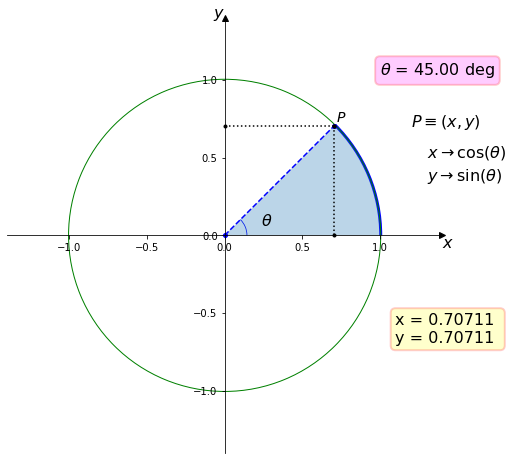

<function __main__.calculate(theta)>

In [13]:
# Utilizzato per importare la libreria adoperata per funzioni matematiche.
import numpy as np
# Utilizzato per importare la libreria adoperata per i widgets.
import ipywidgets as widgets
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare il Markdown con il Python.
from IPython.display import display, Markdown
# Utilizzato per importare la libreria adoperata per rappresentare graficamente le grandezze.
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Wedge


xcenter, ycenter = 0., 0.
width, height = 2.01, 2.01
radius = 1

style = {"description_width":"initial"}
sliderAngle = widgets.FloatSlider(min = 0, max = 360, step = 1, value = 45,
                                  description = "Angle" + r"$ \theta $" + "(°)", style = style, continuous_update = False)
print()

def calculate(theta):
    theta_rad = theta * np.pi / 180 # Angoli in radianti.
    theta_over_pi = theta / 180 # Angoli in (fraction of pi radians).
    # Display the results in Markdown.
    display(Markdown("\n &theta; = {0:0.5f} <b> rad </b> = {1:0.5f} &pi; <b> rad </b><br>".format(theta_rad, theta_over_pi)))
    # Draw a plot.
    makeplot(theta)
#Utilizzato per avere gli assi con la stessa scala.
def makeplot(theta):
    fig2 = plt.figure(2, (8, 8))
    theta_rad = theta * np.pi / 180 # Angoli in radianti.
    xp, yp = np.cos(theta_rad), np.sin(theta_rad)
    # Draw an arc corresponding to the angle theta.
    arc = patches.Arc((xcenter, ycenter), width, height, angle = 0.0, theta1 = 0.0, theta2 = theta, color = "blue", linewidth = 3)
    # Draw a circle having radius = 1.
    circle = patches.Arc((xcenter, ycenter), width, height, angle = 0.0, theta1 = 0.0, theta2 = 360, color = "green", linewidth = 1)
    # Draw a smaller arc corresponding to the angle theta.
    smaller_arc = patches.Arc((xcenter, ycenter), width / 7, height / 7, angle = 0.0, theta1 = 0.0, theta2 = theta, color = "blue", linewidth = 0.8)
    # Same units and same scales for the two axes of the plot.
    ax = fig2.add_subplot(111, aspect = "equal")
    plt.xlim(-1.4, 1.4)
    plt.ylim(-1.4, 1.4)
    # plt.plot(0, 0, 'o', markersize = 4, color = "blue")
    # plt.plot(xp, yp, 'o', ms = 4, color = "blue")
    plt.plot([0, xp], [0, yp], 'o--', ms = 4, color = "blue")
    ax.add_patch(arc)
    ax.add_patch(circle)
    ax.add_patch(smaller_arc)
    # plt.axhline(0)
    # plt.axvline(0)
    plt.plot([xp, xp], [0, yp], "k:.") # Drop a line from the point P down to the x-axis.
    plt.plot([0, xp], [yp, yp], "k:.") # Draw an horizontal line from the point P to the y-axis.
    # radius = 1

    # Draw a circular sector corresponding to the angle theta.
    wedge = Wedge((xcenter, ycenter), radius, 0, theta, alpha = 0.3)
    ax.add_patch(wedge)
    # Write labels on the plot.
    details = "x = {0:0.5f} \ny = {1:0.5f}".format(xp, yp)
    plt.text(1, 1, r"$ \theta $ = {0:0.2f} deg".format(theta),
             fontsize = "16", verticalalignment = "bottom",
             horizontalalignment = "left", bbox = dict(boxstyle = "round", facecolor = "magenta", edgecolor = "red",
                                                       linewidth = 2, alpha = 0.2))
    plt.text(1.2, 0.70, r"$ P\equiv(x, y) $", fontsize = 16, horizontalalignment = "left")
    plt.text(1.3, 0.50, r"$ x\rightarrow \cos(\theta) $", fontsize = 16, horizontalalignment = "left")
    plt.text(1.3, 0.35, r"$ y\rightarrow \sin(\theta) $", fontsize = 16, horizontalalignment = "left")
    plt.text(1.1, -0.5, details, horizontalalignment = "left",
             verticalalignment = "top", fontsize = "16",
             bbox = dict(boxstyle = "round", facecolor = "yellow", edgecolor = "red",
                         linewidth = 2, alpha = 0.2))
    plt.text(xp * 1.01, yp * 1.01, r"$ P $", horizontalalignment = "left", verticalalignment = "bottom", fontsize = "14")
    ax.annotate(r"$ \theta $", (0.25 * np.cos(theta_rad / 2), 0.25 * np.sin(theta_rad / 2)), fontsize = 16, verticalalignment = "center")
    # Some lines of Python code from:
    #
    # https://matplotlib.org/3.3.1/gallery/recipes/centered_spines_with_arrows.html
    #
    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    # Hide the top and right spines.
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax.plot(1, 0, ">k", transform = ax.get_yaxis_transform(), clip_on = False)
    ax.plot(0, 1, "^k", transform = ax.get_xaxis_transform(), clip_on = False)
    ax.annotate(r"$ x $", (1.4, 0), fontsize = 16, verticalalignment = "top", horizontalalignment = "left")
    ax.annotate(r"$ y $", (0, 1.4), fontsize = 16, ha = "right")
    plt.show()

widgets.interact(calculate, theta = sliderAngle)

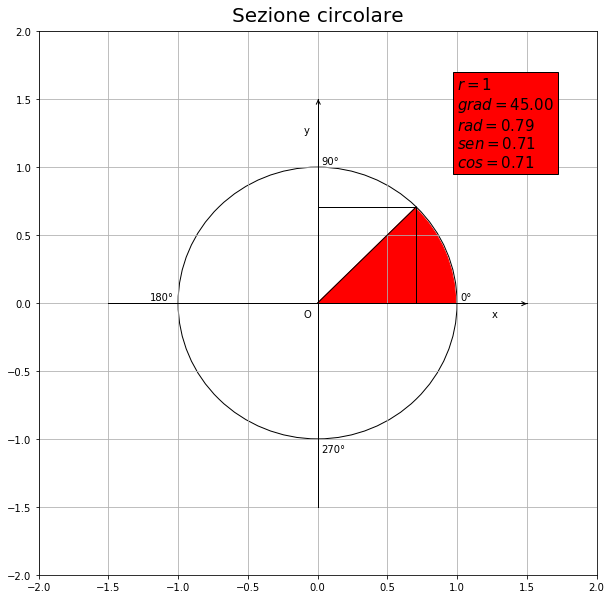

<function __main__.myPlot(ang)>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


# Funzione grafico.
def myPlot(ang):
    fig, axes = plt.subplots(figsize=(10, 10))
    axes.set_title('Sezione circolare', fontdict={'fontsize': 20}, pad=10)
    plt.xlim(-2, 2)
    plt.ylim(-2,2)
    plt.axhline(y=0, xmin=0.125, xmax=0.875, linewidth=1, color='black')
    plt.axvline(x=0, ymin=0.125, ymax=0.875, linewidth=1, color='black')
    axes.annotate("", xy=(1.5, -0.005), xytext=(1.49, -0.005), arrowprops=dict(arrowstyle="->"))
    axes.annotate("", xy=(0.005, 1.5), xytext=(0.005, 1.49), arrowprops=dict(arrowstyle="->"))
    draw_circle = plt.Circle((0, 0), 1, fill=False)
    axes.add_artist(draw_circle)
    sen = np.sin(np.radians(ang))
    cos = np.cos(np.radians(ang))
    testo = '\n'.join((r'$r=1$', r'$grad=%.2f$' % (ang, ), r'$rad=%.2f$' % (np.radians(ang), ),
                       r'$sen=%.2f$' % (sen, ), r'$cos=%.2f$' % (cos, )))
    plt.text(1, 1, testo, fontdict={'fontsize': 15}, bbox=dict(facecolor='red'))
    axes.annotate('O', xy=(-0.1, -0.1))
    axes.annotate('x', xy=(1.25, -0.1))
    axes.annotate('y', xy=(-0.1, 1.25))
    axes.annotate('0°', xy=(1.025, 0.025))
    axes.annotate('90°', xy=(0.025, 1.025))
    axes.annotate('180°', xy=(-1.2, 0.025))
    axes.annotate('270°', xy=(0.025, -1.1))
    axes.add_artist(Wedge((0,0), 0.99, 0, ang, color='red'))
    x0, y0 = [0, cos], [0, sen] # Retta raggio.
    x1, y1 = [0, cos], [sen, sen] # Retta seno?.
    x2, y2 = [cos, cos], [0, sen] # Retta coseno?.
    axes.plot(x0, y0, x1, y1, x2, y2, color='black', linewidth=1)
    plt.grid(True)
    plt.show()

#ang_slide = widgets.IntSlider(min=0, max=360, step=1, value=45, description='Angolo in °:')
ang_text = widgets.IntText(value=45, description='Angolo in °:')
widgets.interact(myPlot, ang=ang_text)

> Per eseguire il codice Python contenuto in questo **notebook** Jupyter, anche se Python e Notebook Jupyter non sono installati sulla macchina che stai adoperando, puoi utilizzare l'ambiente [**binder**](https://mybinder.org) online.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Darkaquon/Physics-with-Open-Source-Software/master?filepath=%2FNotebook%2FFunzioni.ipynb)

## What we have learned

*Python*

* Rappresentare graficamente un settore circolare e un arco di circonferenza.

* Esprimere i risultati come in linguaggio Markdown come testo o come tabella.

* Modificare le dimensioni delle immagini.

* Disegnare una coppia di assi cartesiani ortogonali.

* Inserire caselle di testo in una posizione desiderata all'interno di un grafico.

*Fisica*

* Misura degli angoli in radianti.

* Conversione tra unità di misura: radianti &hArr; gradi.

## References and notes

### Drawing arcs and circles

1. [How to draw an arc of a circle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Arc.html)

2. [Matplotlib documentation on: Arc](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Arc.html)

3. [Example: patches, Arc](https(https://matplotlib.org/3.3.1/gallery/recipes/centered_spines_with_arrows.html)://matplotlib.org/3.1.1/gallery/units/ellipse_with_units.html#sphx-glr-gallery-units-ellipse-with-units-py)

4. [Example: Wedges](https://matplotlib.org/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py) (How to draw a full sector).

### Drawing vertical and horizontal lines

5. How to draw vertical lines to the *x* axis using the **stem** function [6.](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20stem#matplotlib.pyplot.stem) [7.](https://www.mathworks.com/help/matlab/ref/stem.html;jsessionid=601f32f11e85fefdc0abec8f1ae9)

8. How to plot horizontal and vertical lines to the axes [9.](https://stackoverflow.com/questions/46599171/dashed-lines-from-points-to-axes-in-matplotlib) [10.](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

11. [How to draw vertical and horizontal lines](https://likegeeks.com/matplotlib-tutorial/)

### Drawing axes

12. [How to draw additional axes with spines](http://www.ifac.cnr.it/~zoppetti/corsopython/files/pdf/15%20-%20Matplotlib%20-%20Grafici%20singoli.pdf)

13. [Adjusting the location and appearance of axis spines](https://matplotlib.org/3.3.1/gallery/ticks_and_spines/spine_placement_demo.html)

14. [Centered spines with arrows](https://matplotlib.org/3.3.1/gallery/recipes/centered_spines_with_arrows.html)

15. [Axis styles and grids](https://cxc.harvard.edu/chips/gallery/axes.html)

### Ticks

16. [Ticks, tick labels, and grid lines](https://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html)

17. [Major and minor ticks](https://matplotlib.org/3.3.1/gallery/ticks_and_spines/major_minor_demo.html)

### Documentation on **pyplot**

18. [**pyplot** documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.fill)

19. [Tutorial on **pyplot**](https://hpc-forge.cineca.it/files/CoursesDev/public/2014/Python_for_computational_science/Rome/02-matplotlib.pdf)

## Grafica notebook

In [15]:
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare l'HTML con il Python.
from IPython.core.display import HTML


# Utilizzato per aprire e leggere il file CSS adoperato per modificare la visualizzazione del notebook.
css_file = "Notebook.css"
HTML(open(css_file, "r").read())

## Copyright and License
-------------------------
(c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution <a rel = "license" href = "https://creativecommons.org/licenses/by/4.0"> CC BY 4.0 </a> and all code is under [BSD 3 - Clause License.](https://opensource.org/licenses/BSD-3-Clause)

<div align = "center">

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/)
[![License](https://img.shields.io/badge/License-BSD%203--Clause-blue.svg)](https://opensource.org/licenses/BSD-3-Clause)

</div>